# Space times with distribution valued curvature tensors by Taub
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  December 29, 2021 

https://aip.scitation.org/doi/10.1063/1.524568

Go back and add metric 8.2 which is an approximation to Kerr for small rho

Here's a useful link for bessel functions

https://sudonull.com/post/31698-Bessel-Functions-in-SymPy-Symbolic-Math-Program

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,rho,phi,z,dt,drho,dphi,dz = symbols('t rho phi z dt drho dphi dz')

In [4]:
nu = Function('nu')(rho,z)
nu

In [5]:
V = Function('V')(rho,z)
V

In [6]:
variables = Matrix([t,rho,phi,z])
variables

⎡t⎤
⎢ ⎥
⎢ρ⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [7]:
differentials = Matrix([dt,drho,dphi,dz])
differentials 

⎡ dt ⎤
⎢    ⎥
⎢drho⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [8]:
lineElement =  expand( exp(2*(nu-V))*(drho**2 + dz**2) + rho**2 * exp(-2*V) * dphi**2 - exp(2*V)*dt**2 )
lineElement

In [9]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅V(ρ, z)                                                                ⎤
⎢-ℯ                     0                   0                   0           ⎥
⎢                                                                           ⎥
⎢              -2⋅V(ρ, z)  2⋅ν(ρ, z)                                        ⎥
⎢     0       ℯ          ⋅ℯ                 0                   0           ⎥
⎢                                                                           ⎥
⎢                                      2  -2⋅V(ρ, z)                        ⎥
⎢     0                 0             ρ ⋅ℯ                      0           ⎥
⎢                                                                           ⎥
⎢                                                      -2⋅V(ρ, z)  2⋅ν(ρ, z)⎥
⎣     0                 0                   0         ℯ          ⋅ℯ         ⎦

In [10]:
import sympy

In [11]:
m = sympy.Array(g)
m

⎡  2⋅V(ρ, z)                                                                ⎤
⎢-ℯ                     0                   0                   0           ⎥
⎢                                                                           ⎥
⎢              -2⋅V(ρ, z)  2⋅ν(ρ, z)                                        ⎥
⎢     0       ℯ          ⋅ℯ                 0                   0           ⎥
⎢                                                                           ⎥
⎢                                      2  -2⋅V(ρ, z)                        ⎥
⎢     0                 0             ρ ⋅ℯ                      0           ⎥
⎢                                                                           ⎥
⎢                                                      -2⋅V(ρ, z)  2⋅ν(ρ, z)⎥
⎣     0                 0                   0         ℯ          ⋅ℯ         ⎦

In [12]:
from einsteinpy.symbolic import *

In [13]:
syms = sympy.symbols("t rho phi z")
t,rho,phi,z = syms

In [14]:
metric = MetricTensor(m,syms)

In [15]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                            ⎡ 4⋅V(ρ, z) - 2⋅ν(ρ, z) ∂                                                                   
⎢⎡             ∂               ∂          ⎤  ⎢ℯ                     ⋅──(V(ρ, z))               0                               0         
⎢⎢     0       ──(V(ρ, z))  0  ──(V(ρ, z))⎥  ⎢                       ∂ρ                                                                  
⎢⎢             ∂ρ              ∂z         ⎥  ⎢                                                                                           
⎢⎢                                        ⎥  ⎢                                      ∂             ∂                                      
⎢⎢∂                                       ⎥  ⎢                0                   - ──(V(ρ, z)) + ──(ν(ρ, z))                  0         
⎢⎢──(V(ρ, z))       0       0       0     ⎥  ⎢                                      ∂ρ            ∂ρ                                     
⎢⎢∂ρ                              

In [16]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡⎛    2                2                       ⎞                                                                                         
⎢⎜   ∂                ∂             ∂          ⎟  4⋅V(ρ, z) - 2⋅ν(ρ, z)                                                                  
⎢⎜ρ⋅───(V(ρ, z)) + ρ⋅───(V(ρ, z)) + ──(V(ρ, z))⎟⋅ℯ                                                                                       
⎢⎜    2                2            ∂ρ         ⎟                                                                                         
⎢⎝  ∂ρ               ∂z                        ⎠                                                                                         
⎢──────────────────────────────────────────────────────────────────────                                                        0         
⎢                                  ρ                                                                                                     
⎢                                 

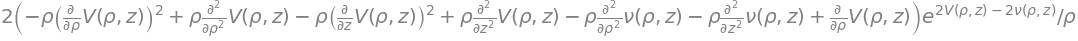

In [17]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [18]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡⎛    2                2                       ⎞                              ⎛                 2       2                           2    
⎢⎜   ∂                ∂             ∂          ⎟  4⋅V(ρ, z) - 2⋅ν(ρ, z)       ⎜    ⎛∂          ⎞       ∂               ⎛∂          ⎞     
⎢⎜ρ⋅───(V(ρ, z)) + ρ⋅───(V(ρ, z)) + ──(V(ρ, z))⎟⋅ℯ                        1.0⋅⎜- ρ⋅⎜──(V(ρ, z))⎟  + ρ⋅───(V(ρ, z)) - ρ⋅⎜──(V(ρ, z))⎟  + ρ
⎢⎜    2                2            ∂ρ         ⎟                              ⎜    ⎝∂ρ         ⎠        2              ⎝∂z         ⎠     
⎢⎝  ∂ρ               ∂z                        ⎠                              ⎝                       ∂ρ                                 
⎢────────────────────────────────────────────────────────────────────── + ───────────────────────────────────────────────────────────────
⎢                                  ρ                                                                                                     
⎢                                 

In [19]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [20]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [21]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡⎛    2                2                       ⎞                                                                                         
⎢⎜   ∂                ∂             ∂          ⎟  4⋅V(ρ, z) - 2⋅ν(ρ, z)                                                                  
⎢⎜ρ⋅───(V(ρ, z)) + ρ⋅───(V(ρ, z)) + ──(V(ρ, z))⎟⋅ℯ                                                                                       
⎢⎜    2                2            ∂ρ         ⎟                                                                                         
⎢⎝  ∂ρ               ∂z                        ⎠                                                                                         
⎢──────────────────────────────────────────────────────────────────────                                                        0         
⎢                                  ρ                                                                                                     
⎢                                 

In [22]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡⎛                 2           2                           2           2                2                2                           ⎞   
⎢⎜    ⎛∂          ⎞           ∂               ⎛∂          ⎞           ∂                ∂                ∂                 ∂          ⎟  4
⎢⎜- ρ⋅⎜──(V(ρ, z))⎟  + 2.0⋅ρ⋅───(V(ρ, z)) - ρ⋅⎜──(V(ρ, z))⎟  + 2.0⋅ρ⋅───(V(ρ, z)) - ρ⋅───(ν(ρ, z)) - ρ⋅───(ν(ρ, z)) + 2.0⋅──(V(ρ, z))⎟⋅ℯ 
⎢⎜    ⎝∂ρ         ⎠            2              ⎝∂z         ⎠            2                2                2                ∂ρ         ⎟   
⎢⎝                           ∂ρ                                      ∂z               ∂ρ               ∂z                            ⎠   
⎢────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                             ρ                                                          
⎢                                 

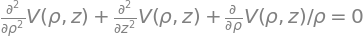

In [23]:
equation7pt4a = Eq( expand((1/rho)*ricciSimplified[2,2].args[1]),0)
equation7pt4a

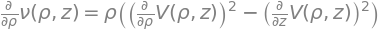

In [24]:
equation7pt4b = Eq( diff(nu,rho) , solve( einsteinSimplified[1,1] , diff(nu,rho) )[0] )
equation7pt4b

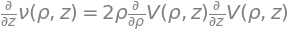

In [25]:
equation7pt4c = Eq(diff(nu,z) , solve( ricciSimplified[1,3] , diff(nu,z) )[0] ) 
equation7pt4c

In [27]:
vacuumFieldEquations = Matrix([equation7pt4a,equation7pt4b,equation7pt4c])
vacuumFieldEquations

⎡                                ∂                ⎤
⎢    2              2            ──(V(ρ, z))      ⎥
⎢   ∂              ∂             ∂ρ               ⎥
⎢  ───(V(ρ, z)) + ───(V(ρ, z)) + ─────────── = 0  ⎥
⎢    2              2                 ρ           ⎥
⎢  ∂ρ             ∂z                              ⎥
⎢                                                 ⎥
⎢                ⎛             2                2⎞⎥
⎢∂               ⎜⎛∂          ⎞    ⎛∂          ⎞ ⎟⎥
⎢──(ν(ρ, z)) = ρ⋅⎜⎜──(V(ρ, z))⎟  - ⎜──(V(ρ, z))⎟ ⎟⎥
⎢∂ρ              ⎝⎝∂ρ         ⎠    ⎝∂z         ⎠ ⎠⎥
⎢                                                 ⎥
⎢    ∂                 ∂           ∂              ⎥
⎢    ──(ν(ρ, z)) = 2⋅ρ⋅──(V(ρ, z))⋅──(V(ρ, z))    ⎥
⎣    ∂z                ∂ρ          ∂z             ⎦

In [28]:
X, Y = map(Function, 'XY')

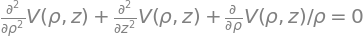

In [29]:
eq = vacuumFieldEquations[0]
eq

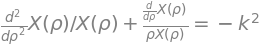

In [41]:
xODE = Eq(pde_separate( eq, V, [X(rho),Y(z)])[0] , -k**2 ) 
xODE

In [42]:
xSolution = dsolve( xODE , X(rho))
xSolution 

In [48]:
#  this is made up.  we are arbitrarily setting one Bessel function equal to zero.  I think that one blows up at the orgin.  Go back and check this 
xSolutionParticular = xSolution.subs(xSolution.args[1].args[0].args[0],1).subs(xSolution.args[1].args[1].args[0],0)
xSolutionParticular

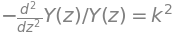

In [44]:
yODE = Eq( pde_separate( eq, V, [X(rho),Y(z)])[1] ,  k**2 ) 
yODE

In [45]:
ySolution = dsolve( yODE , Y(z))
ySolution 

In [49]:
#  Here we are arbitrarily setting the cos function to zero.  Go back and fix this
ySolutionParticular = ySolution.subs(ySolution.args[1].args[0].args[0],1).subs(ySolution.args[1].args[1].args[0],0)
ySolutionParticular

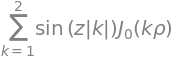

In [50]:
#  Here we arbitrary pick just two terms as an example... 
Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,2) )

In [52]:
psiSumTwoTerms = Eq(V, Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,2) ).doit() ) 
psiSumTwoTerms

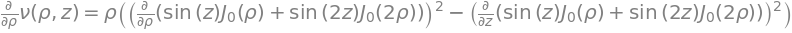

In [54]:
dnudrhoPDE = vacuumFieldEquations[1].subs(psiSumTwoTerms.args[0],psiSumTwoTerms.args[1])
dnudrhoPDE

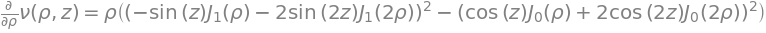

In [55]:
dnudrhoPDE.doit()

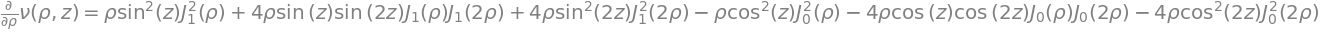

In [56]:
expand(dnudrhoPDE.doit())

In [62]:
integrateNuWRTrho = pdsolve( expand(dnudrhoPDE.doit()) )
integrateNuWRTrho

In [77]:
nuSolutionRho = integrateNuWRTrho.subs(integrateNuWRTrho.args[1].args[6],0)
nuSolutionRho

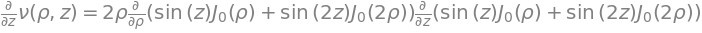

In [58]:
dnudzPDE = vacuumFieldEquations[2].subs(psiSumTwoTerms.args[0],psiSumTwoTerms.args[1])
dnudzPDE

In [59]:
dnudzPDE.doit()

In [60]:
expand(dnudzPDE.doit())

In [63]:
integrateNuWRTz = pdsolve( expand(dnudzPDE.doit()) )
integrateNuWRTz

In [69]:
#  I have no idea what this constant is actually called in Python... so... we set it equal to zero the long way 
integrateNuWRTz.args[1].args[4]

In [78]:
nuSolutionZ = integrateNuWRTz.subs( integrateNuWRTz.args[1].args[4],0)
nuSolutionZ

In [81]:
from sympy.plotting import plot3d

In [84]:
#  So... this doesn't work... 
#  plot3d(nuSolutionZ.args[1] , (rho,0,1),(z,0,1) )

In [83]:
from mpl_toolkits import mplot3d